# GRIP - The Sparks Foundation

# Data Science and Business Analytics Intenship

# Intern - Priya Pudke

# Task 2 - Prediction Using Decision Tree Algorithm

# Aim - Creation of decision tree classifier and representation using graph

STEP: Importing all neccessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

STEP : Loading the data set.

In [2]:
iris_set = datasets.load_iris()
i_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)

STEP : Checking for general information about dataset.

In [3]:
i_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
i_data.shape

(150, 4)

In [5]:
i_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
i_data.tail() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
i_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


STEP : Checking if any null value is present.

In [8]:
i_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

STEP : Spliting data into two parts: feature and target.

In [9]:
i_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
i_data["species"] = iris_set.target

fea_data = iris_set.data
tar_data = iris_set.target

In [10]:
#Printing the feature/attribute data.
print(iris_set.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


STEP : Visualizing the sepal and petal dimensions.

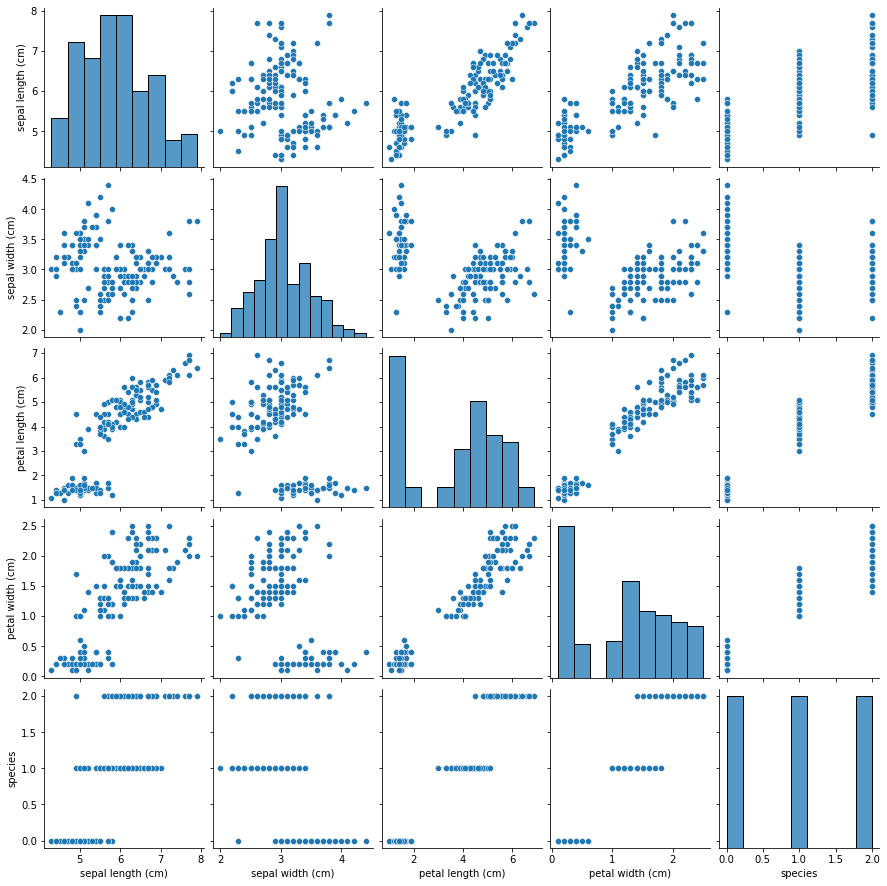

In [11]:
sbn.pairplot(i_data)

#This shows the variation in attributes in classes of flower

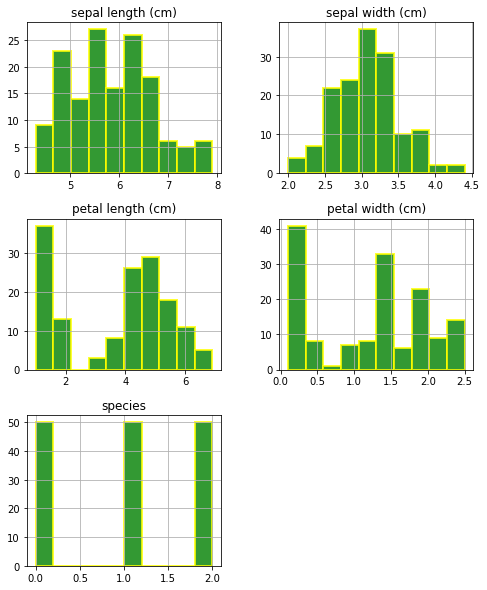

In [12]:
i_data.hist(color='green', alpha=0.8, label='Value', edgecolor='yellow', linewidth=2, figsize=(8,10));

STEP : Analysing correlation between feature and target data: graphical and mathematical manner.

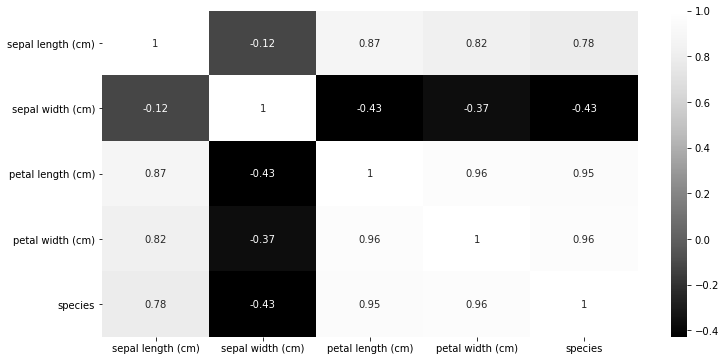

In [13]:
plt.figure(figsize=(12,6))
sbn.heatmap(i_data.corr(), annot=True, cmap='Greys_r');

In [14]:
i_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


STEP : Spliting data into train and test data set.

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(i_data, test_size = 0.2)

STEP : Training, fitting data and creating object of Decision tree classifier.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(fea_data, tar_data, test_size=0.2, random_state=50)

print('Training successfull')

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

print('Instance of an decision tree successfully created')

Training successfull
Instance of an decision tree successfully created


In [17]:
len(X_train)

#We can change the number of trained data by replacing intended test_size while training the data.

120

In [18]:
len(y_test)

30

STEP : Checking predicted value of train data.

In [19]:
y_pred = clf.predict(X_train)
print(y_pred)

[2 1 1 2 0 0 1 2 1 0 0 1 2 0 2 0 0 0 2 2 1 0 0 1 2 1 1 0 0 2 2 1 2 0 0 2 1
 0 1 0 2 2 1 2 1 0 1 0 1 1 0 0 1 0 1 0 1 2 2 2 1 2 0 2 0 1 0 2 0 0 2 2 2 2
 0 2 1 2 1 0 1 2 0 2 1 1 1 1 2 1 0 2 0 2 0 1 2 0 0 1 2 1 0 0 0 2 1 1 2 1 1
 0 2 0 2 1 2 0 2 2]


STEP : Checking the accuracy of prediction done before.

Accuracy of trained data:
 1.0


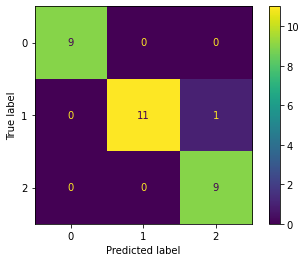

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
    
print("Accuracy of trained data:\n",accuracy_score(y_train,y_pred))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

STEP : Here fitting the data for visualizing Decision tree.

In [21]:
d_tree1 = DecisionTreeClassifier()
d_tree1.fit(fea_data, tar_data)

DecisionTreeClassifier()

STEP : Visualising decising tree.

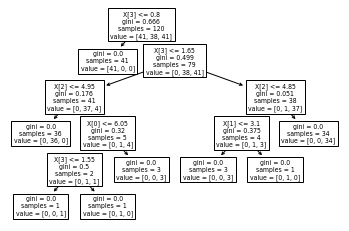

<Figure size 720x720 with 0 Axes>

In [22]:
#Plotting the decision tree.

tree.plot_tree(clf);
plt.figure(figsize=(10,10))
plt.show()

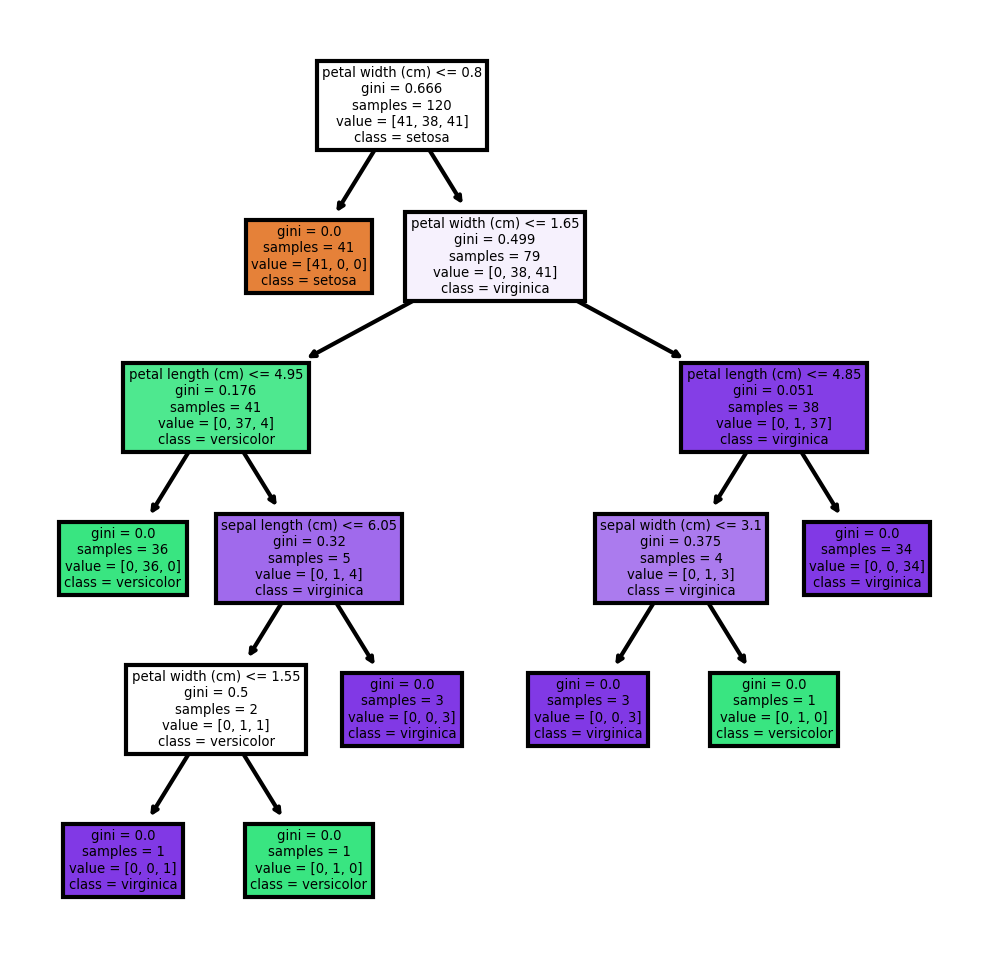

In [23]:
#Predictable decision tree.

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [24]:
#To save the decision tree.

fig.savefig('imagename.png')

In [25]:
print('Task 2 Successfully COMPLETED!')

Task 2 Successfully COMPLETED!
